<a href="https://colab.research.google.com/github/sidharthram99/sidharth/blob/main/Recruitment_platform_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df=pd.read_excel("1job-seekers.xlsx")
df.head(5)


,Name,Mobile,Email,Address,City,DOB,Gender,Functional_Area,Area_of_Specialization,Industry,...,Work_Experience,Level,Preferred_Location,Course(Highest_Education),Specialization(Highest_Education),Institute(Highest_Education),Course(2nd_Highest_Education),Specialization(2nd_Highest_Education),Institute(2nd_Highest_Education),Resume_Id
0,PANKAJKUMAR,9959146000,pankajhiya@yahoo.com,"MOULI TOWERS, FLAT NO. 2-1 2ND FLOOR, CHANDRAM...",Vijayawada,1966-12-08 00:00:00,Male,Engg. project Mgmt./site Engg./Civil Engg.,"Building/Residential, Civil, Commercial, Highw...",Construction/Cement/Metal/Steel/Iron,...,17,"Senior -Sr. Manager, General Manager",Anywhere in North India,BE/B.Tech,Civil,Pune University,BE/B.Tech,Civil,Pune University,109951899
1,somasekhar reddy,9848172697,somuakepati@rediff.com,"PLOT NO.78, K.P.NAGAR, NEAR BENZ CIRCLE, VIJAY...",Vijayawada,1976-06-20 00:00:00,Male,Sales/Business Development,Retail Sales,Others,...,8,"Junior - Executive, Assistant",Hyderabad/ Secunderabad,MBA/PGDM,Marketing,IGNOU,MBA/PGDM,Marketing,IGNOU,106447071
2,KEERTHIlanka,9985719671,keerthi_lanka2006@yahoo.co.in,"D/O L.VENKATESWARA RAO, D.NO:32-1-7, PRAJASAKT...",Vijayawada,1987-05-01 00:00:00,Female,IT/Telecom - Hardware,Hardware Design,Engineering/Projects,...,6 months,"Middle - Manager, Assistant Manager",Anywhere in East India,BE/B.Tech,Electronics/Telecommunication,Andhra University,12th,Other 12th,Nagarjuna University,107743383
3,mutnurisaikishore,9989499424,mutnurisai1980@yahoo.co.in,M.SAIKISHORE C\O SERR LAKSHMI HOMELAND APPT.. ...,Vijayawada,1980-03-11 00:00:00,Male,Banks/Insurance/Financial Services,Banking -General,Banking,...,7,"Junior - Executive, Assistant",No Preference,B.Com,Commerce Honors,Nagarjuna University,Diploma,Computers,Jawaharlal Nehru University,109008155
4,pavan kumar kosadgi,9848795464,pavansupermax@rediffmail.com,"HNo:5-11-674, RTC Colony, Yellammagutta, Nizam...",Vijayawada,1973-11-27 00:00:00,Male,Sales/Business Development,Channel Sales,Consumer Durables/FMCG,...,10,"Middle - Manager, Assistant Manager","Hyderabad/ Secunderabad,Nizamabad,Warangal",MBA/PGDM,Advertising/Mass Communication,Shivaji University,B.Com,Commerce Pass,Osmania University,42837378


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Name                                   161 non-null    object
 1   Mobile                                 161 non-null    object
 2   Email                                  161 non-null    object
 3   Address                                159 non-null    object
 4   City                                   161 non-null    object
 5   DOB                                    161 non-null    object
 6   Gender                                 161 non-null    object
 7   Functional_Area                        161 non-null    object
 8   Area_of_Specialization                 161 non-null    object
 9   Industry                               161 non-null    object
 10  Resume_Title                           161 non-null    object
 11  Key_Skills         

In [ ]:
df.shape

(161, 24)

In [ ]:
df.isna().sum()

,0
Name,0
Mobile,0
Email,0
Address,2
City,0
DOB,0
Gender,0
Functional_Area,0
Area_of_Specialization,0
Industry,0


In [ ]:
df.columns

Index(['Name', 'Mobile', 'Email', 'Address', 'City', 'DOB', 'Gender',
       'Functional_Area', 'Area_of_Specialization', 'Industry', 'Resume_Title',
       'Key_Skills', 'Company', 'Salary', 'Work_Experience', 'Level',
       'Preferred_Location', 'Course(Highest_Education)',
       'Specialization(Highest_Education)', 'Institute(Highest_Education)',
       'Course(2nd_Highest_Education)',
       'Specialization(2nd_Highest_Education)',
       'Institute(2nd_Highest_Education)', 'Resume_Id'],
      dtype='object')

In [ ]:

df['Salary'] = df['Salary'].str.replace(r'[^\d]', '', regex=True).astype(float)


print(df['Salary'].head())

0    1650000.0
1     200000.0
2     106000.0
3     200000.0
4     350000.0
Name: Salary, dtype: float64


In [ ]:
columns_to_analyze = ['City', 'Industry', 'Functional_Area', 'Preferred_Location']

for column in columns_to_analyze:
    print(f"Category counts for {column}:")
    category_counts = df[column].value_counts()
    print(category_counts)
    print("\n")

Category counts for City:
City
Vijayawada                          19
Anantapur                           19
Belgaum                             19
Hyderabad                           17
GUJARAT                             12
MEGHALAYA                            7
MAHARASHTRA(Washim)                  6
BIHAR                                6
CHHATTISGARH                         5
MEGHALAYA(Byrnihat)                  4
CHHATTISGARH(korba)                  3
MAHARASHTRA(wardha)                  3
MAHARASHTRA(washim)                  2
MAHARASHTRA(WASHIM)                  2
MAHARASHTRA(Wardha)                  2
MAHARASHTRA(YAWATMAL)                2
GUJARAT(Surendranagar)               1
GUJARAT(Patan)                       1
GUJARAT(Silvassa)                    1
MAHARASHTRA(YAVATMAL)                1
MAHARASHTRA(yeola)                   1
MAHARASHTRA(Yavatmal)                1
CHHATTISGARH(KORBA)                  1
MAHARASHTRA(Warora)                  1
MEGHALAYA(BYRNIHAT)              

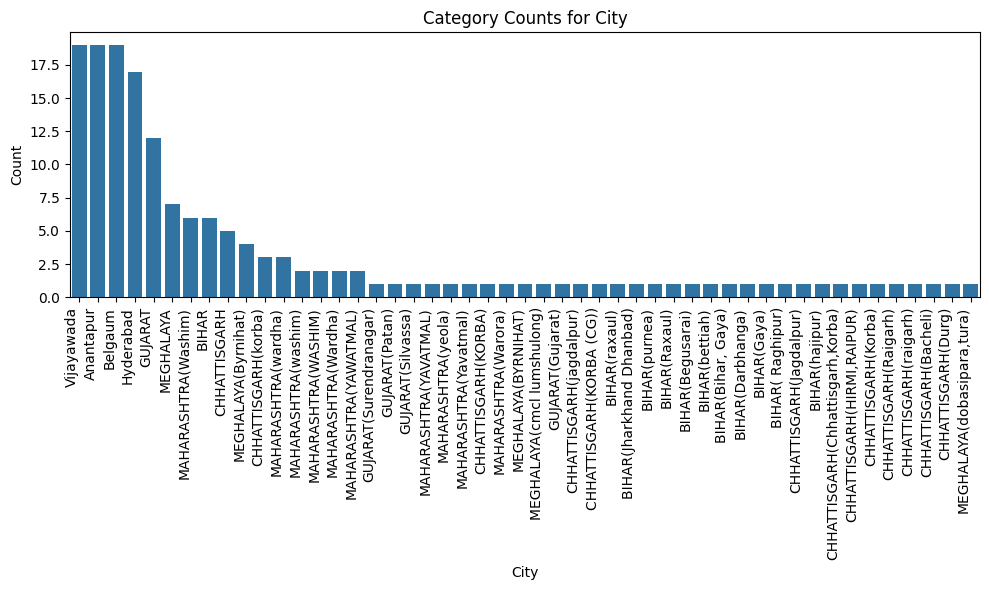

<ipython-input-9-5021fb5c45c0>:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


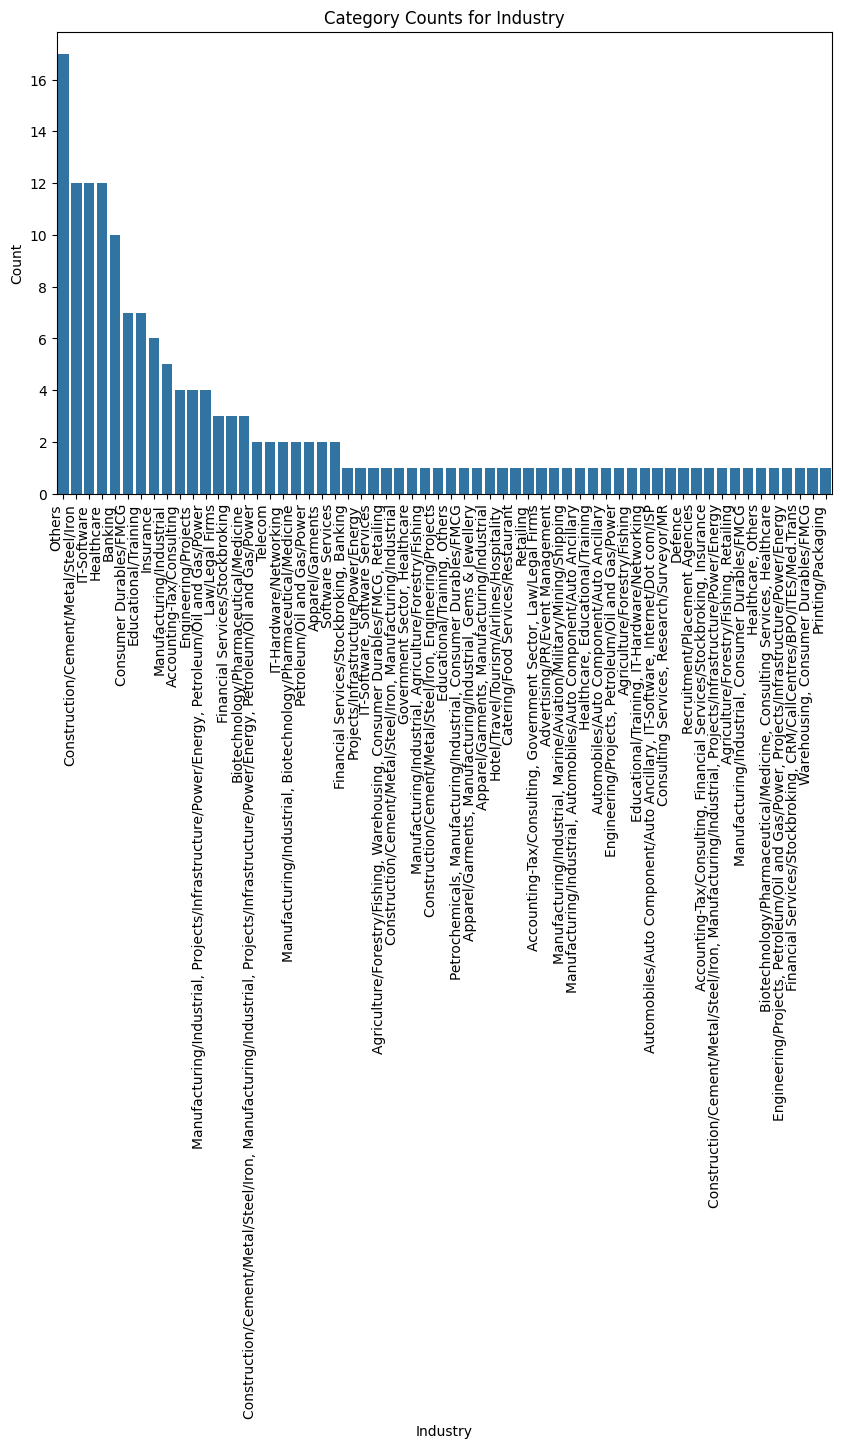

<ipython-input-9-5021fb5c45c0>:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


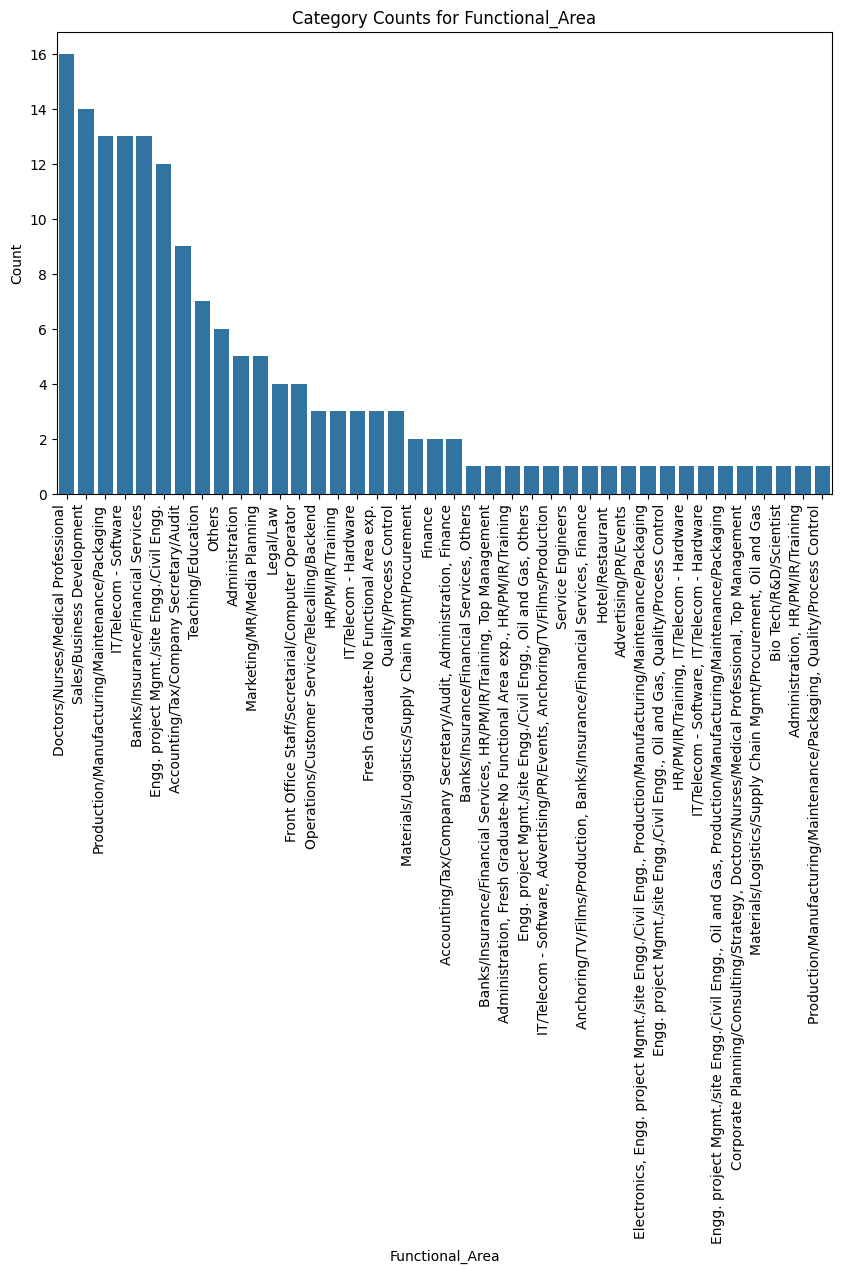

<ipython-input-9-5021fb5c45c0>:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


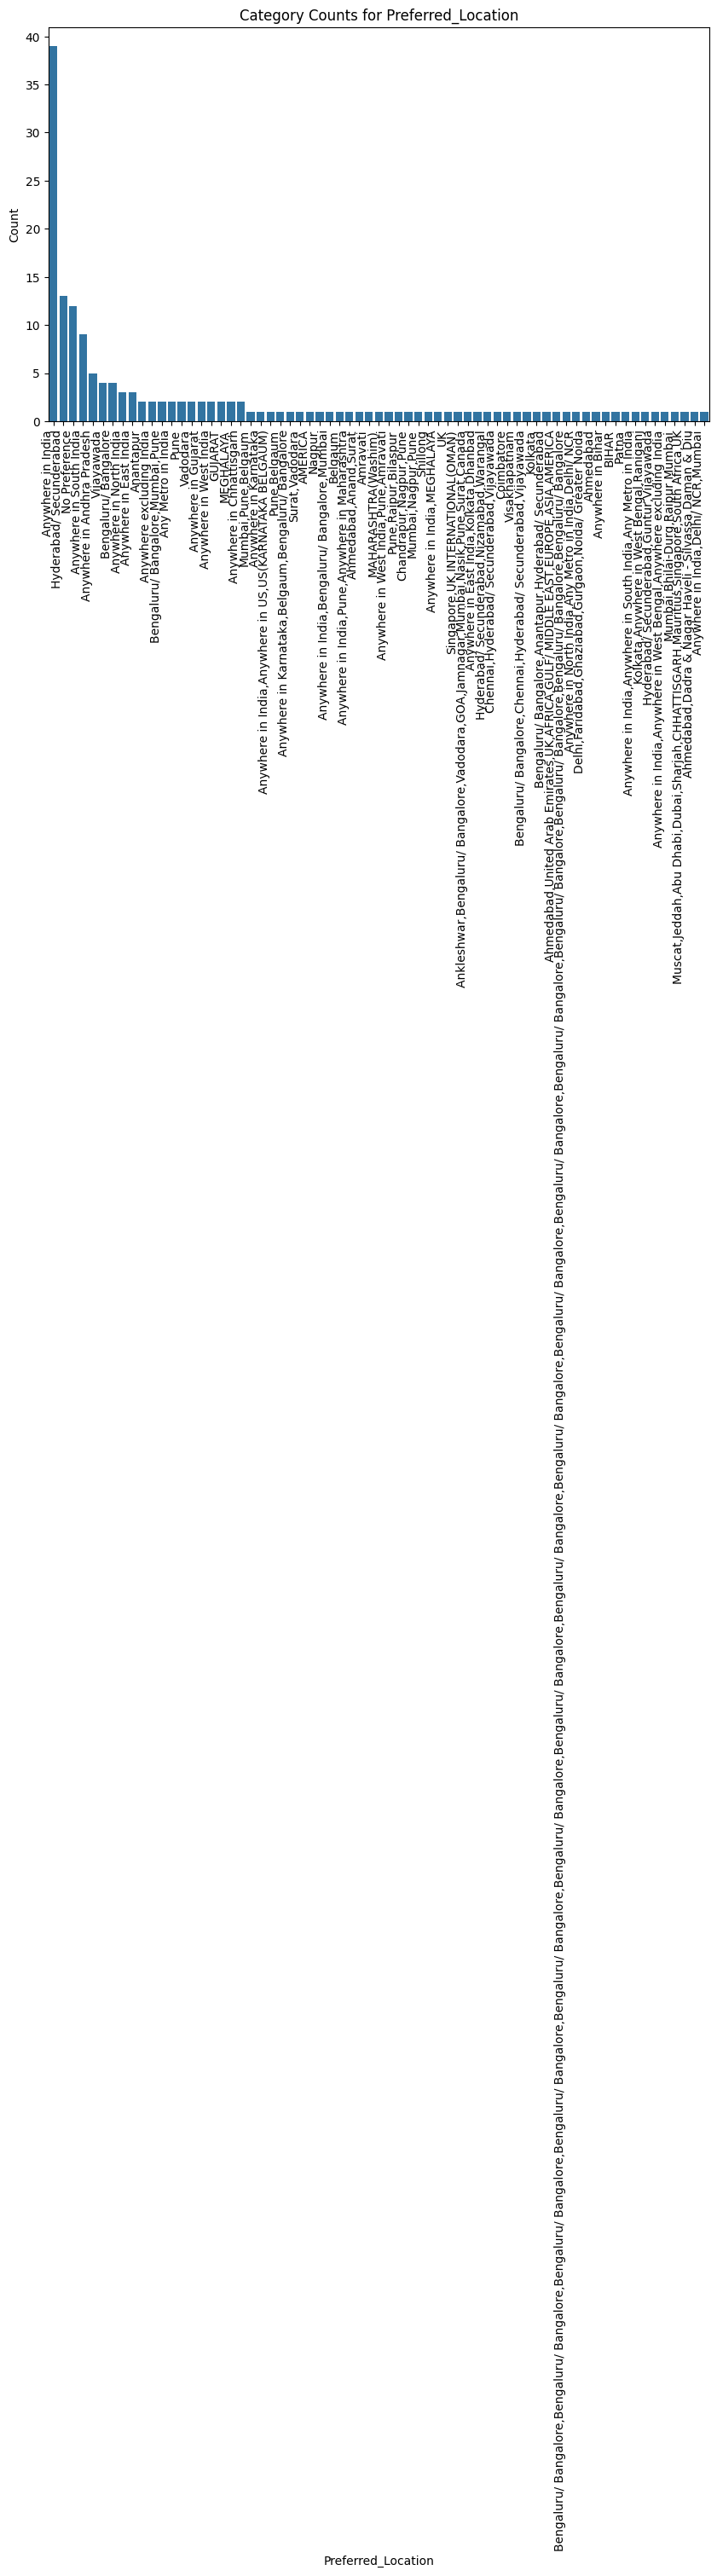

In [ ]:
for column in columns_to_analyze:
    plt.figure(figsize=(10, 6))
    category_counts = df[column].value_counts()
    sns.barplot(x=category_counts.index, y=category_counts.values)
    plt.title(f"Category Counts for {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()

In [ ]:
df['Work_Experience'] = pd.to_numeric(df['Work_Experience'], errors='coerce')
work_experience_mean = df['Work_Experience'].mean()
work_experience_median = df['Work_Experience'].median()
work_experience_std = df['Work_Experience'].std()


salary_mean = df['Salary'].mean()
salary_median = df['Salary'].median()
salary_std = df['Salary'].std()

print(f"Work Experience - Mean: {work_experience_mean}, Median: {work_experience_median}, Std: {work_experience_std}")
print(f"Salary - Mean: {salary_mean}, Median: {salary_median}, Std: {salary_std}")

Work Experience - Mean: 5.937007874015748, Median: 4.0, Std: 5.250469414382497
Salary - Mean: 348437.5, Median: 250000.0, Std: 399854.63848533627


In [ ]:
from datetime import datetime
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')


today = datetime.today()


df['age'] = today.year - df['DOB'].dt.year - ((today.month < df['DOB'].dt.month) | ((today.month == df['DOB'].dt.month) & (today.day < df['DOB'].dt.day))).astype(int)


print(df.head())

                  Name      Mobile                          Email  \
0          PANKAJKUMAR  9959146000           pankajhiya@yahoo.com   
1     somasekhar reddy  9848172697         somuakepati@rediff.com   
2         KEERTHIlanka  9985719671  keerthi_lanka2006@yahoo.co.in   
3    mutnurisaikishore  9989499424     mutnurisai1980@yahoo.co.in   
4  pavan kumar kosadgi  9848795464   pavansupermax@rediffmail.com   

                                             Address        City        DOB  \
0  MOULI TOWERS, FLAT NO. 2-1 2ND FLOOR, CHANDRAM...  Vijayawada 1966-12-08   
1  PLOT NO.78, K.P.NAGAR, NEAR BENZ CIRCLE, VIJAY...  Vijayawada 1976-06-20   
2  D/O L.VENKATESWARA RAO, D.NO:32-1-7, PRAJASAKT...  Vijayawada 1987-05-01   
3  M.SAIKISHORE C\O SERR LAKSHMI HOMELAND APPT.. ...  Vijayawada 1980-03-11   
4  HNo:5-11-674, RTC Colony, Yellammagutta, Nizam...  Vijayawada 1973-11-27   

   Gender                             Functional_Area  \
0    Male  Engg. project Mgmt./site Engg./Civil Engg.

In [ ]:
age_bins = [0, 18, 25, 35, 45, 60, 100]
age_labels = ['0-18', '19-25', '26-35', '36-45', '46-60', '61+']

df['Age_Group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

age_group_counts = df['Age_Group'].value_counts().sort_index()

print(age_group_counts)

Age_Group
0-18      0
19-25     0
26-35     0
36-45    84
46-60    66
61+      11
Name: count, dtype: int64


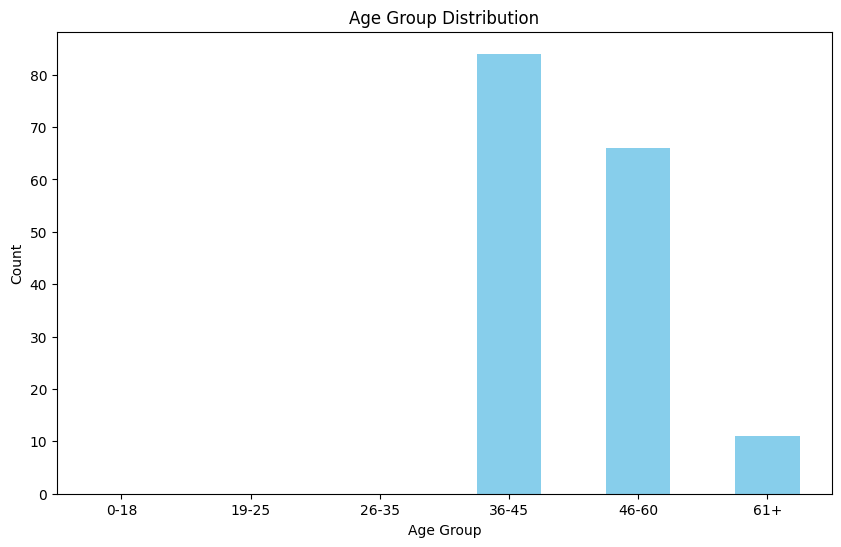

In [ ]:
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='skyblue')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
level_counts = df['Level'].value_counts()

most_common_level = level_counts.idxmax()
most_common_count = level_counts.max()

print(f"The level with the most count is '{most_common_level}' with {most_common_count} occurrences.")

The level with the most count is 'Middle - Manager, Assistant Manager' with 57 occurrences.


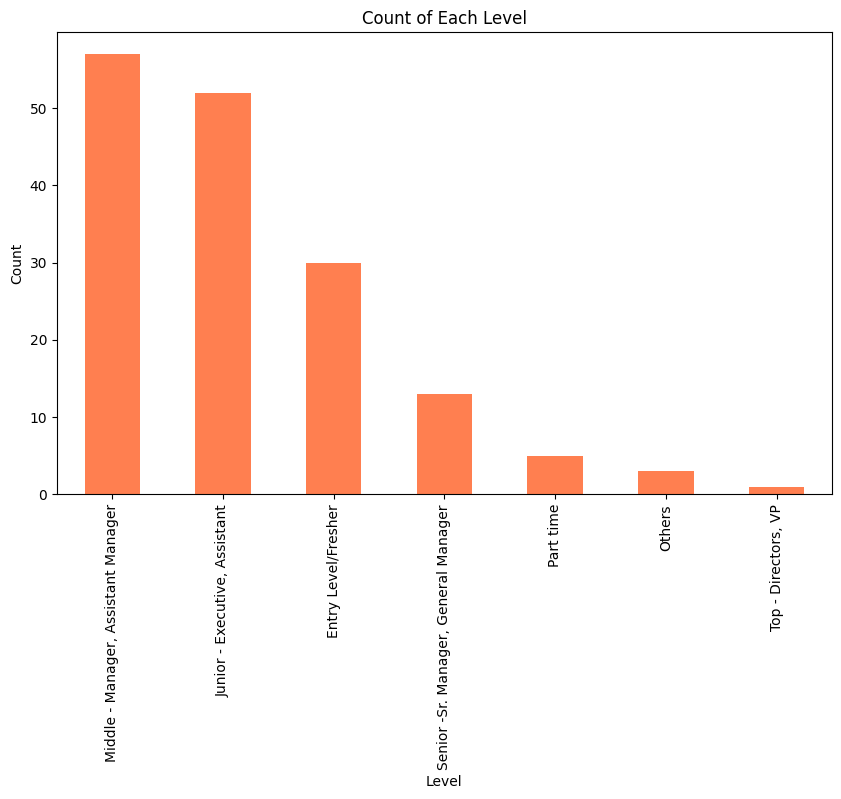

In [ ]:
plt.figure(figsize=(10, 6))
level_counts.plot(kind='bar', color='coral')
plt.title('Count of Each Level')
plt.xlabel('Level')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

                                             Industry  Count
0                           Accounting-Tax/Consulting      4
1   Accounting-Tax/Consulting, Financial Services/...      1
2   Accounting-Tax/Consulting, Government Sector, ...      1
3                     Advertising/PR/Event Management      1
4                        Agriculture/Forestry/Fishing      1
5             Agriculture/Forestry/Fishing, Retailing      1
6   Agriculture/Forestry/Fishing, Warehousing, Con...      1
7                                    Apparel/Garments      2
8          Apparel/Garments, Manufacturing/Industrial      1
9   Apparel/Garments, Manufacturing/Industrial, Ge...      1
10          Automobiles/Auto Component/Auto Ancillary      1
11  Automobiles/Auto Component/Auto Ancillary, IT-...      1
12                                            Banking     10
13              Biotechnology/Pharmaceutical/Medicine      3
14  Biotechnology/Pharmaceutical/Medicine, Consult...      1
15                  Cate

<ipython-input-16-49d633b925b2>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Industry', data=industry_group, palette='muted', order=industry_group.sort_values('Count', ascending=False)['Industry'])


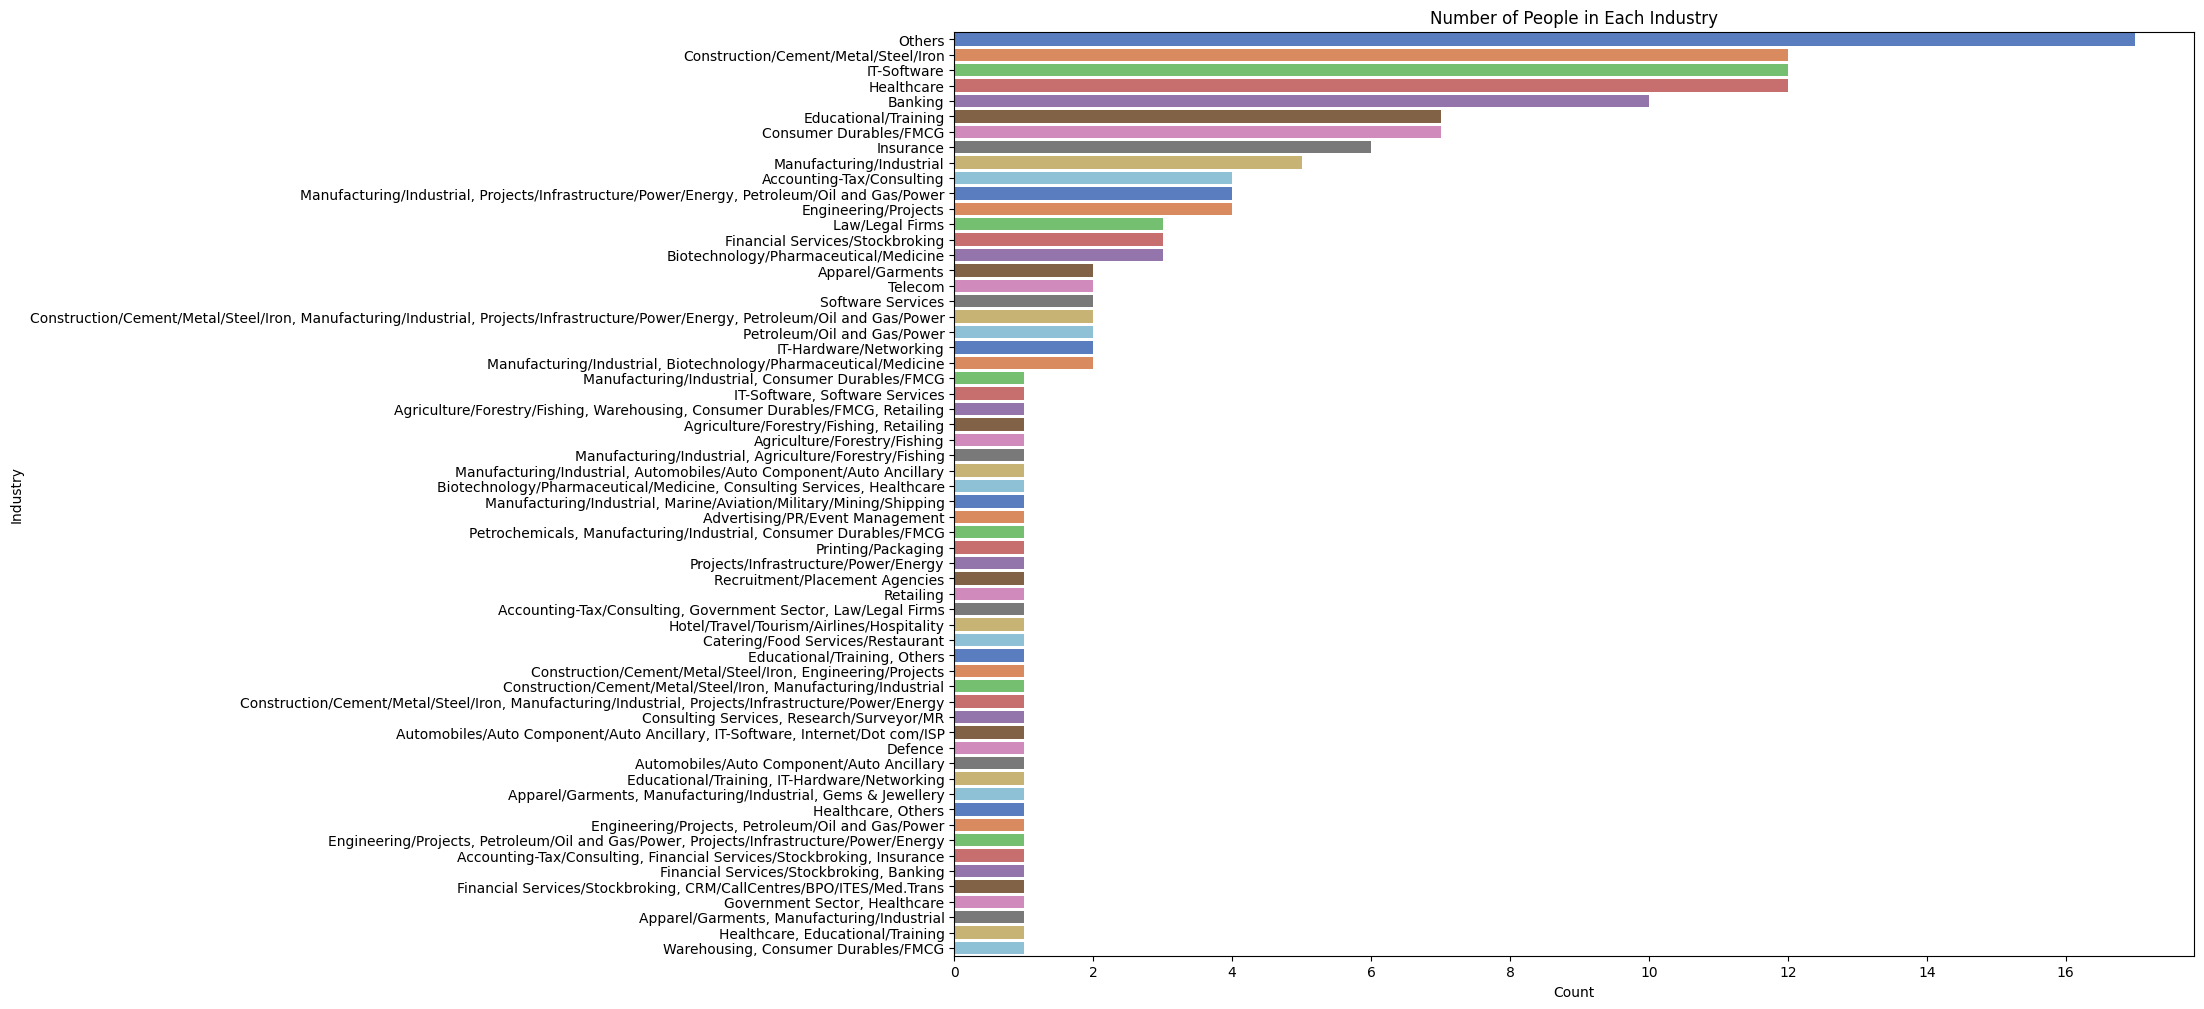

<ipython-input-16-49d633b925b2>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Salary', y='Industry', data=average_salary_by_industry, palette='coolwarm', order=average_salary_by_industry.sort_values('Average Salary', ascending=False)['Industry'])


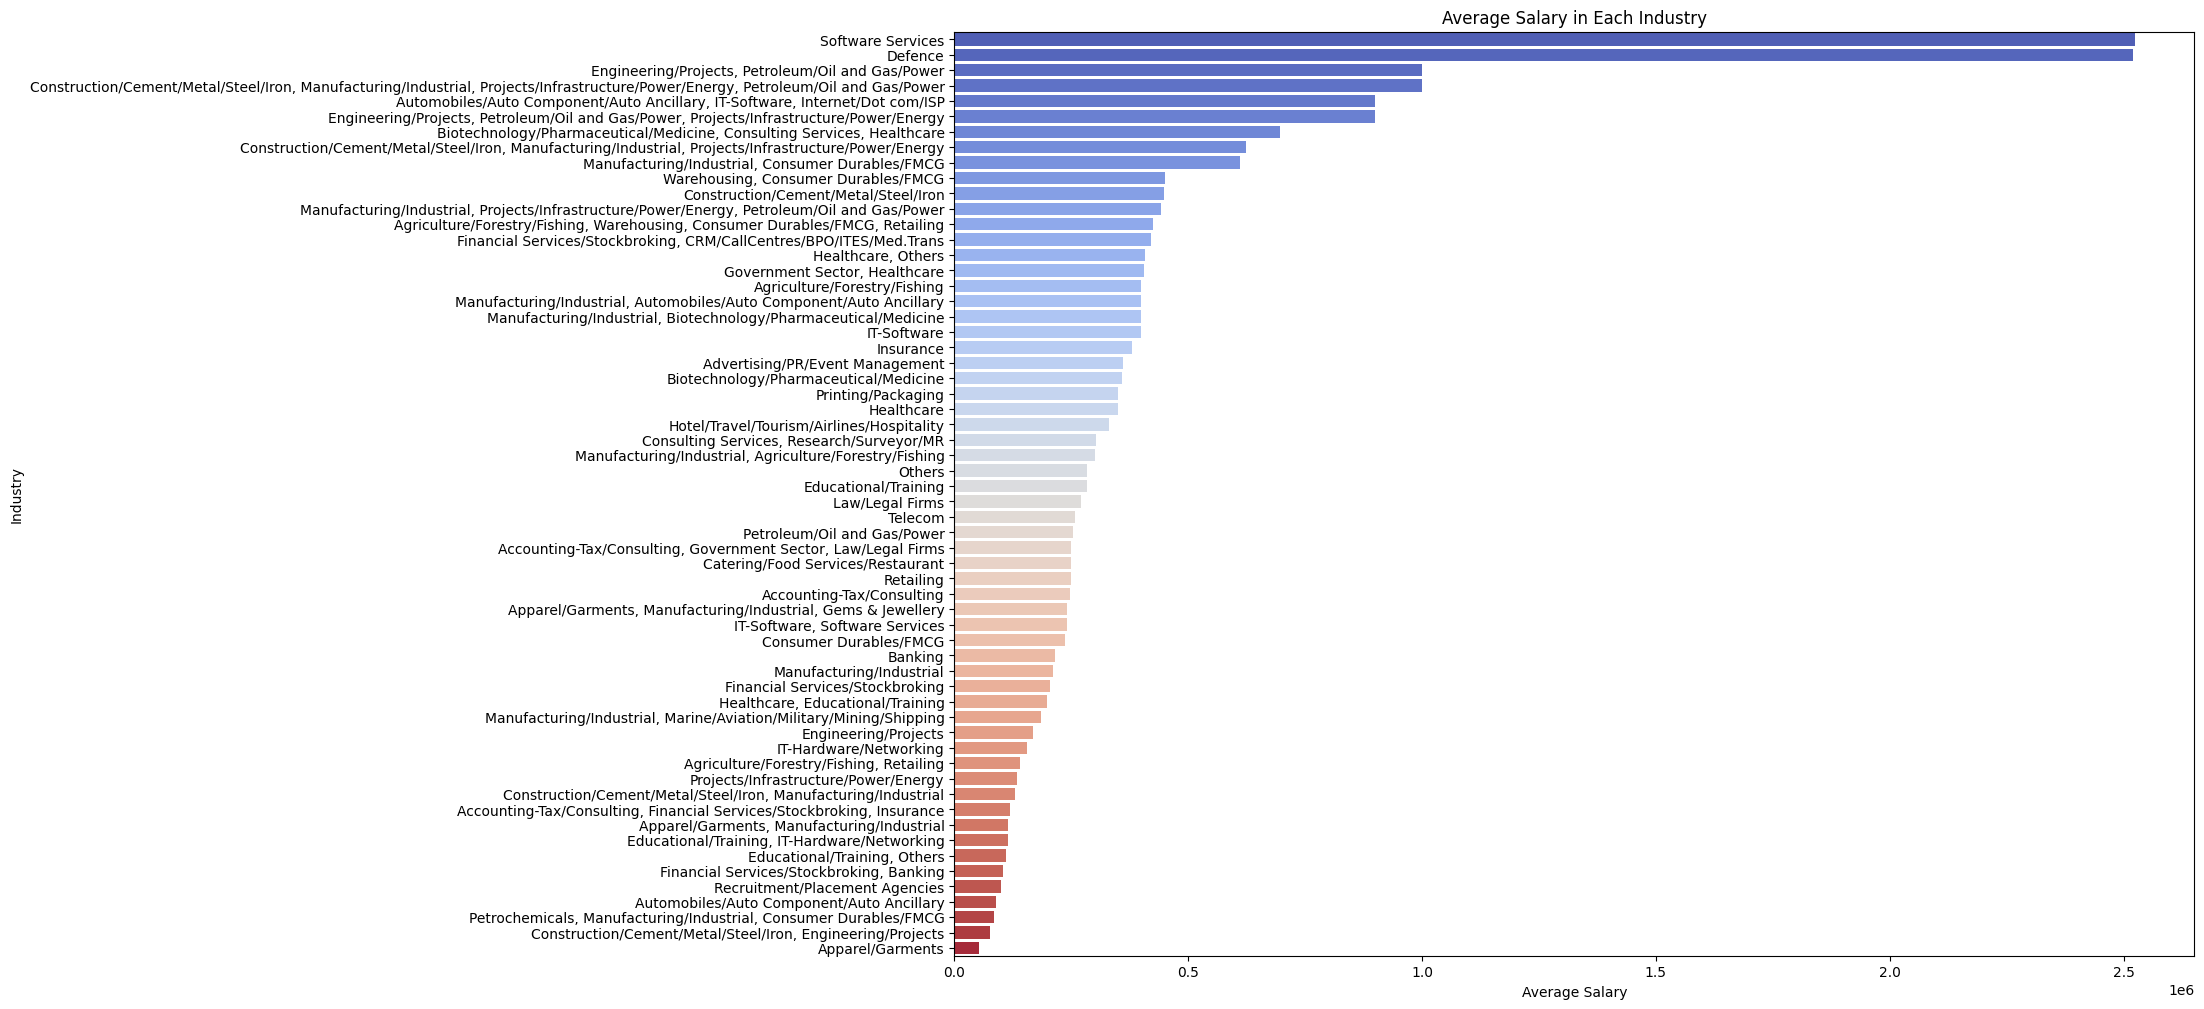

In [ ]:
industry_group = df.groupby('Industry').size().reset_index(name='Count')

# Display the industry group
print(industry_group)

# Plot the count of people in each industry
plt.figure(figsize=(16, 12))
sns.barplot(x='Count', y='Industry', data=industry_group, palette='muted', order=industry_group.sort_values('Count', ascending=False)['Industry'])
plt.title('Number of People in Each Industry')
plt.xlabel('Count')
plt.ylabel('Industry')
plt.show()

# Analyzing average salary in each industry (if Salary is available)
average_salary_by_industry = df.groupby('Industry')['Salary'].mean().reset_index(name='Average Salary')
average_salary_by_industry['Average Salary'] = average_salary_by_industry['Average Salary'].astype(int)

# Plot the average salary by industry
plt.figure(figsize=(16, 12))
sns.barplot(x='Average Salary', y='Industry', data=average_salary_by_industry, palette='coolwarm', order=average_salary_by_industry.sort_values('Average Salary', ascending=False)['Industry'])
plt.title('Average Salary in Each Industry')
plt.xlabel('Average Salary')
plt.ylabel('Industry')
plt.show()

                                   Preferred_Location  Count
0                                             AMERICA      1
1                                           Ahmedabad      1
2                               Ahmedabad,Anand,Surat      1
3   Ahmedabad,Dadra & Nagar Haveli - Silvassa,Dama...      1
4   Ahmedabad,United Arab Emirates,UK,AFRICA,GULF/...      1
..                                                ...    ...
62                                     Surat,Vadodara      1
63                                                 UK      1
64                                           Vadodara      2
65                                         Vijayawada      4
66                                      Visakhapatnam      1

[67 rows x 2 columns]


<ipython-input-17-09f638b0d2e3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Preferred_Location', data=city_group, palette='muted', order=city_group.sort_values('Count', ascending=False)['Preferred_Location'])


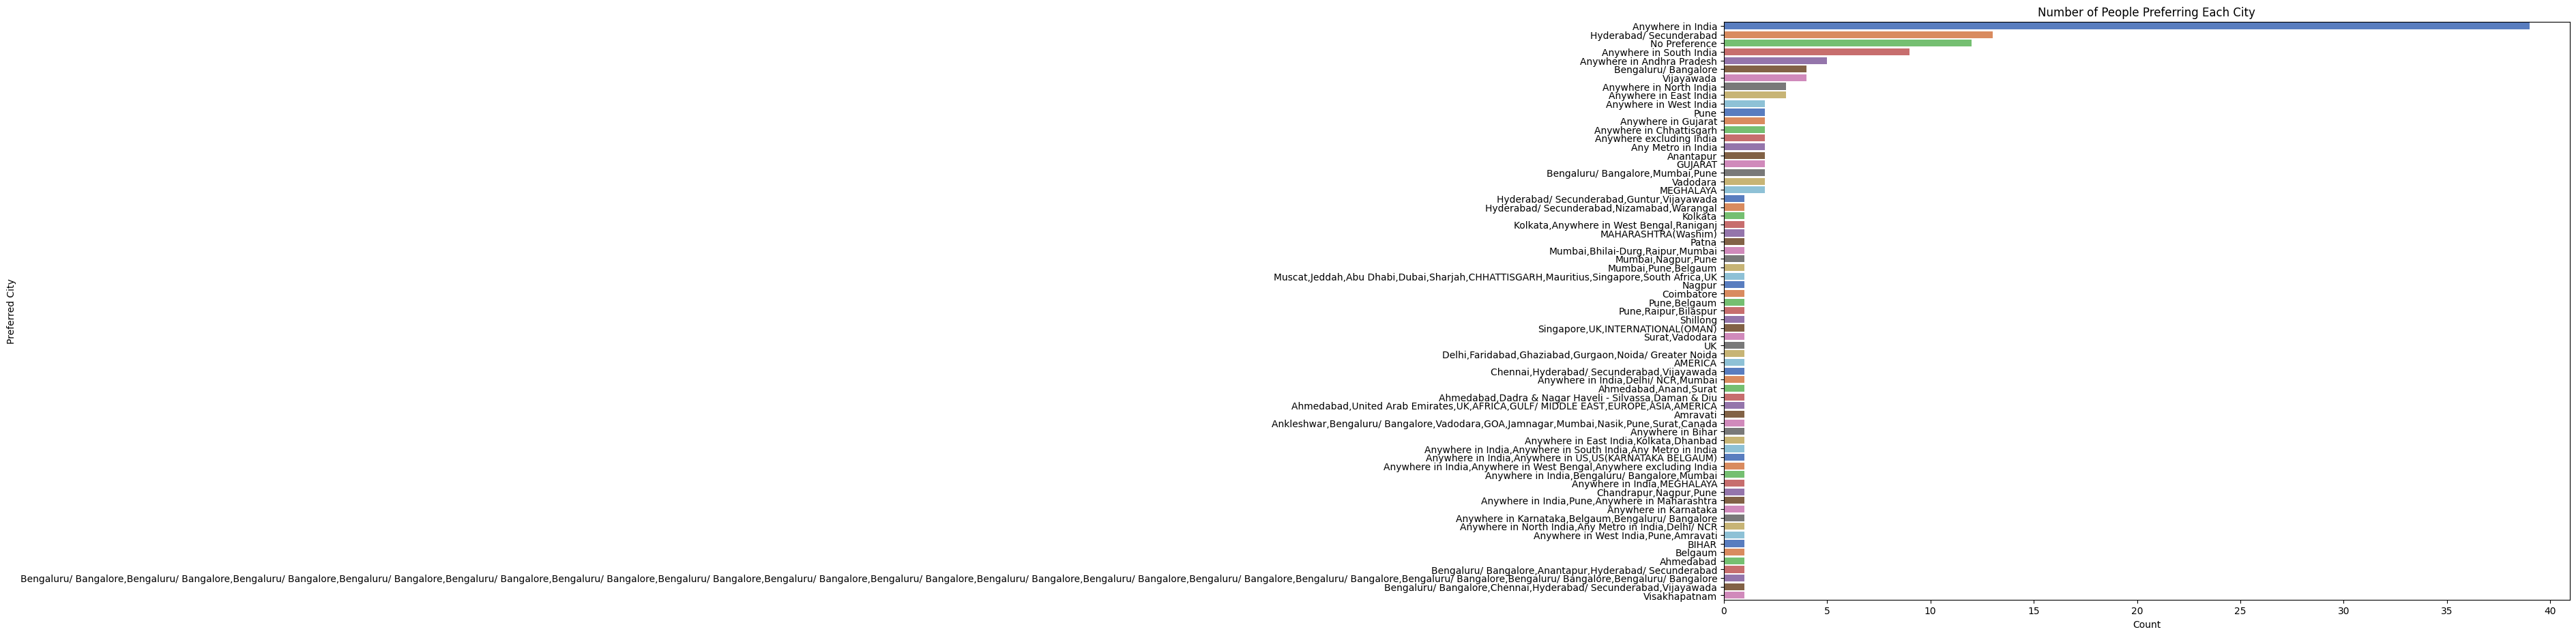

<ipython-input-17-09f638b0d2e3>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Salary', y='Preferred_Location', data=average_salary_by_city, palette='coolwarm', order=average_salary_by_city.sort_values('Average Salary', ascending=False)['Preferred_Location'])


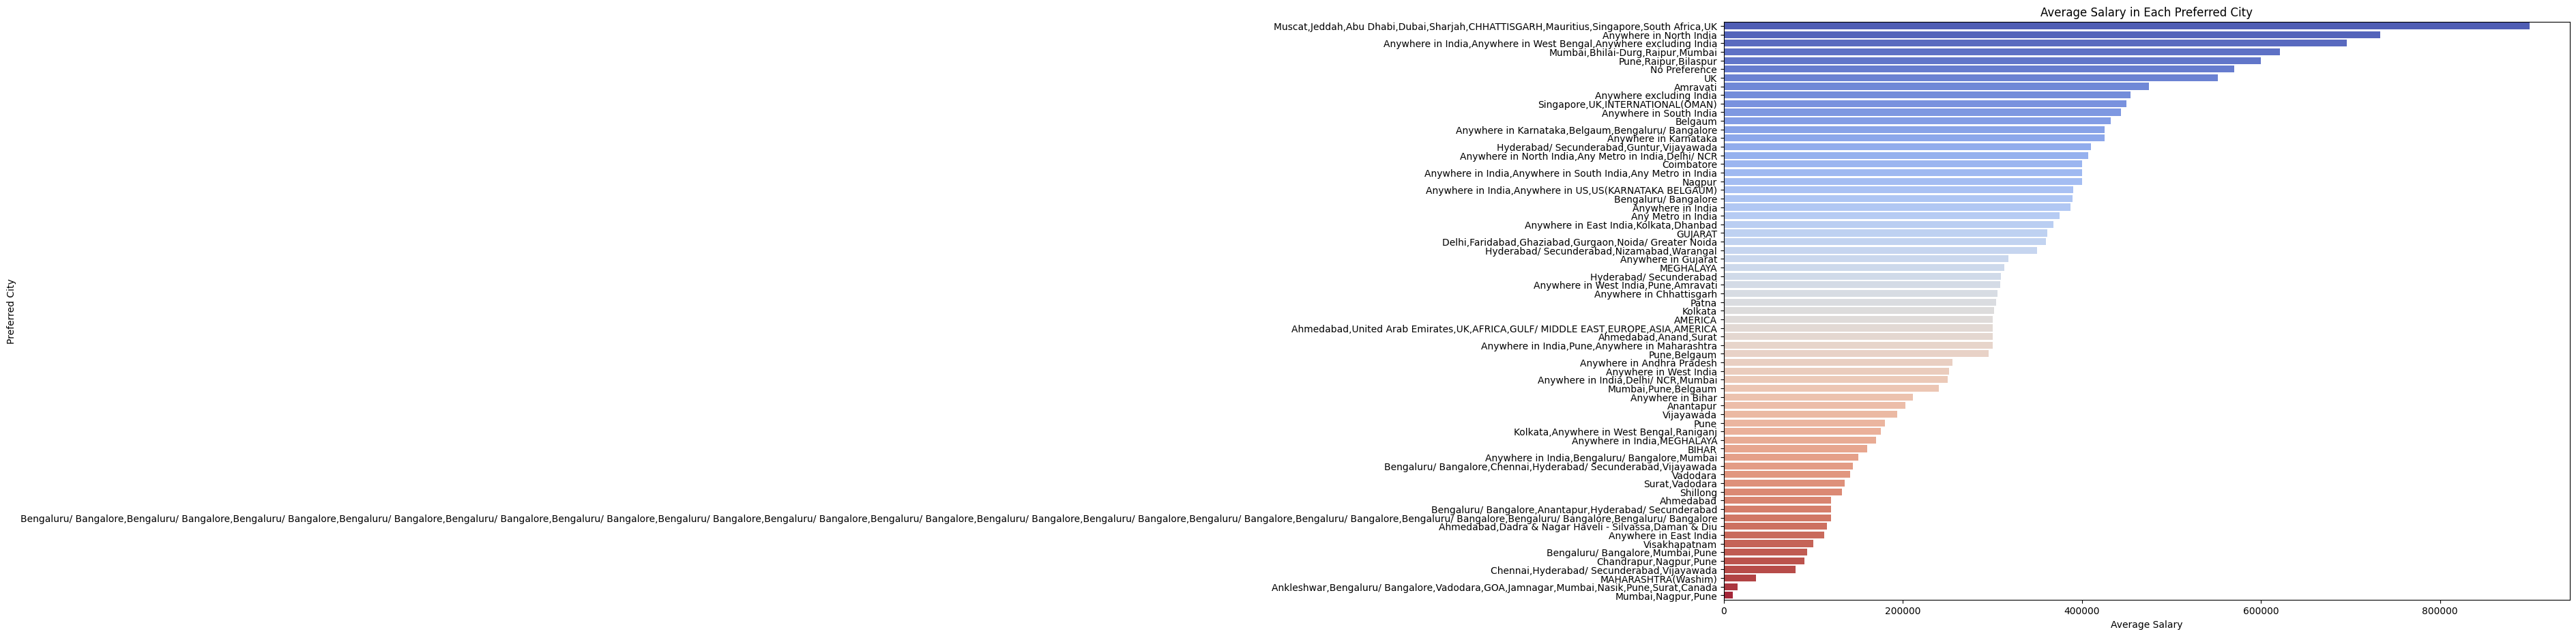

In [ ]:
city_group = df.groupby('Preferred_Location').size().reset_index(name='Count')

# Display the city group
print(city_group)

# Plot the count of people in each preferred city
plt.figure(figsize=(16, 11))
sns.barplot(x='Count', y='Preferred_Location', data=city_group, palette='muted', order=city_group.sort_values('Count', ascending=False)['Preferred_Location'])
plt.title('Number of People Preferring Each City')
plt.xlabel('Count')
plt.ylabel('Preferred City')
plt.show()

# Analyzing average salary in each preferred city (if Salary is available)
average_salary_by_city = df.groupby('Preferred_Location')['Salary'].mean().reset_index(name='Average Salary')
average_salary_by_city['Average Salary'] = average_salary_by_city['Average Salary'].astype(int)

# Plot the average salary by preferred city
plt.figure(figsize=(16, 11))
sns.barplot(x='Average Salary', y='Preferred_Location', data=average_salary_by_city, palette='coolwarm', order=average_salary_by_city.sort_values('Average Salary', ascending=False)['Preferred_Location'])
plt.title('Average Salary in Each Preferred City')
plt.xlabel('Average Salary')
plt.ylabel('Preferred City')
plt.show()

In [ ]:
salary_mean = df['Salary'].mean()
df['Salary'].fillna(salary_mean, inplace=True)
print(df['Salary'].isnull().sum())

0


<ipython-input-18-7ba49fb35091>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Salary'].fillna(salary_mean, inplace=True)


<ipython-input-19-524b6f2a6139>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Level', data=level_group, palette='muted', order=level_group.sort_values('Count', ascending=False)['Level'])


                                  Level  Count
0                   Entry Level/Fresher     30
1         Junior - Executive, Assistant     52
2   Middle - Manager, Assistant Manager     57
3                                Others      3
4                             Part time      5
5  Senior -Sr. Manager, General Manager     13
6                   Top - Directors, VP      1


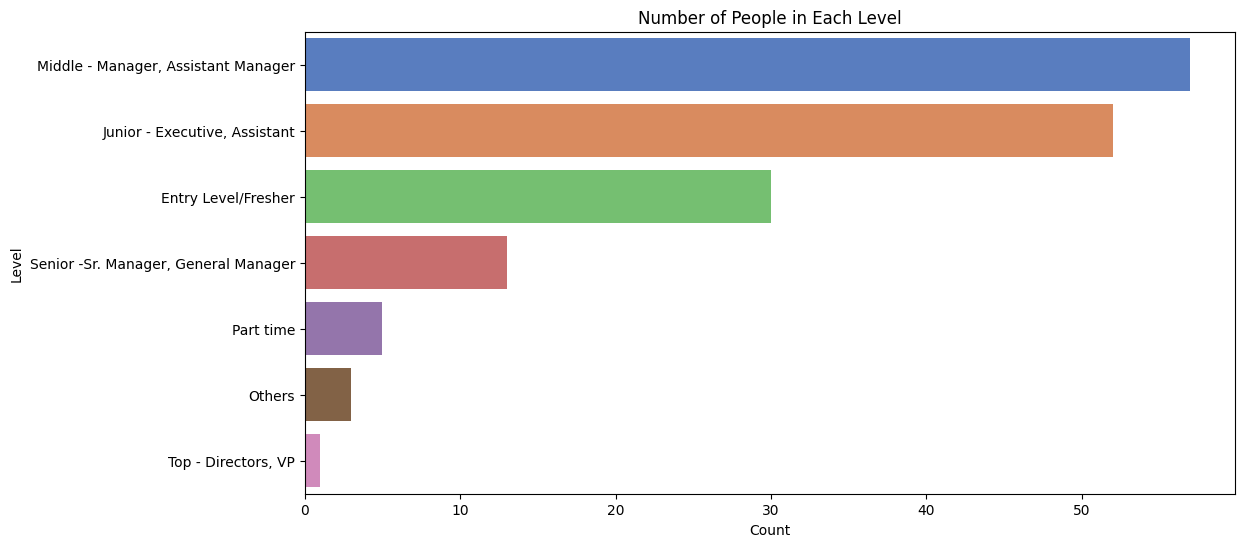

<ipython-input-19-524b6f2a6139>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Salary', y='Level', data=average_salary_by_level, palette='coolwarm', order=average_salary_by_level.sort_values('Average Salary', ascending=False)['Level'])


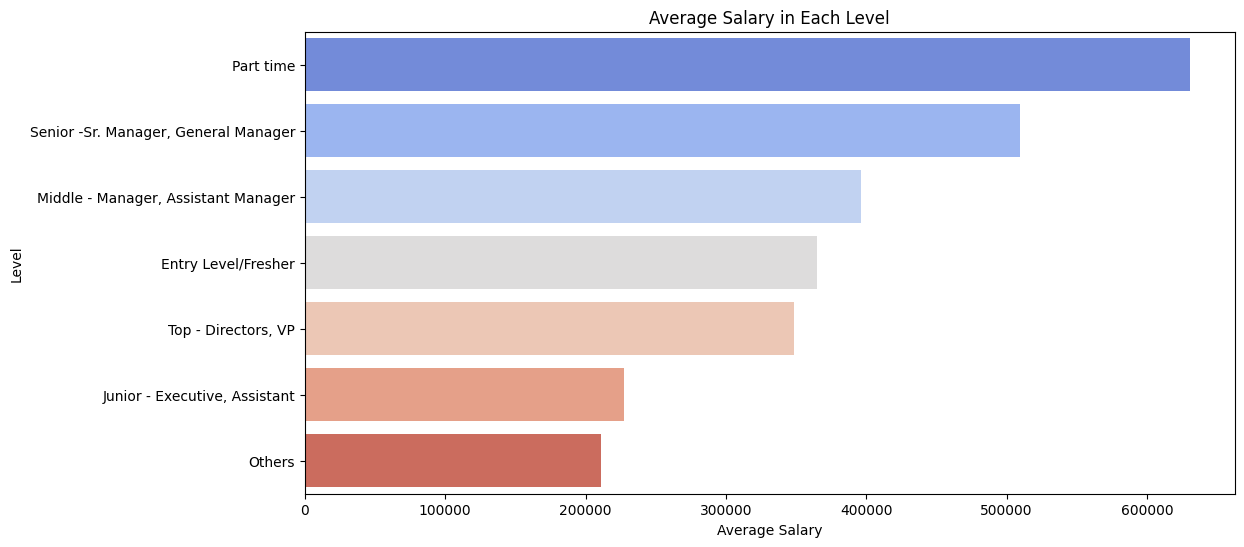

In [ ]:


# Group the dataset by Level and analyze each segment
level_group = df.groupby('Level').size().reset_index(name='Count')

# Display the level group
print(level_group)

# Plot the count of people in each level
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Level', data=level_group, palette='muted', order=level_group.sort_values('Count', ascending=False)['Level'])
plt.title('Number of People in Each Level')
plt.xlabel('Count')
plt.ylabel('Level')
plt.show()

# Analyzing average salary in each level (if Salary is available)
average_salary_by_level = df.groupby('Level')['Salary'].mean().reset_index(name='Average Salary')
average_salary_by_level['Average Salary'] = average_salary_by_level['Average Salary'].astype(int)

# Plot the average salary by level
plt.figure(figsize=(12, 6))
sns.barplot(x='Average Salary', y='Level', data=average_salary_by_level, palette='coolwarm', order=average_salary_by_level.sort_values('Average Salary', ascending=False)['Level'])
plt.title('Average Salary in Each Level')
plt.xlabel('Average Salary')
plt.ylabel('Level')
plt.show()


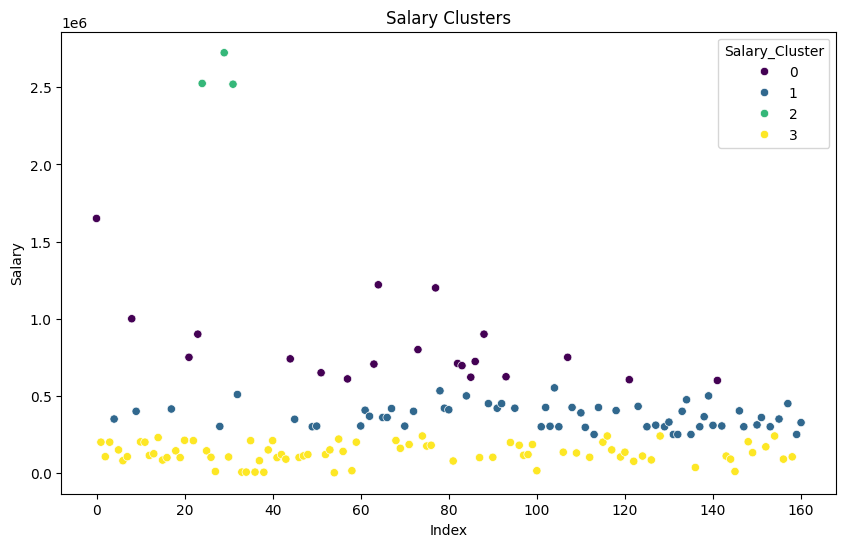

Cluster Centers (Actual Salary Values): [[ 822750.        ]
 [ 366990.46610169]
 [2589666.66666667]
 [ 129392.40506329]]


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Salary_Normalized'] = scaler.fit_transform(df[['Salary']])

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=0)
df['Salary_Cluster'] = kmeans.fit_predict(df[['Salary_Normalized']])

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y='Salary', hue='Salary_Cluster', palette='viridis', data=df)
plt.title('Salary Clusters')
plt.xlabel('Index')
plt.ylabel('Salary')
plt.show()

# Analyze the cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers (Actual Salary Values):", cluster_centers)

In [ ]:
df['Work_Experience'] = df['Work_Experience'].apply(
    lambda x: x.replace('months', '').strip() if isinstance(x, str) else x
)



In [ ]:
experience_summary = df.groupby('Work_Experience').agg(
    count=('Work_Experience', 'size'),
    average_salary=('Salary', 'mean')
).reset_index()

# Display the result
print(experience_summary)

    Work_Experience  count  average_salary
0               1.0     19    3.211579e+05
1               2.0     26    2.857692e+05
2               3.0      9    2.964444e+05
3               4.0     10    2.792000e+05
4               5.0     11    2.786364e+05
5               6.0     11    4.144545e+05
6               7.0      5    2.474000e+05
7               8.0      5    3.324000e+05
8               9.0      7    5.424286e+05
9              10.0      4    3.835000e+05
10             11.0      4    4.052500e+05
11             12.0      3    5.416667e+05
12             13.0      2    4.750000e+05
13             14.0      1    6.960000e+05
14             16.0      1    1.500000e+04
15             17.0      1    1.650000e+06
16             18.0      1    4.320000e+05
17             19.0      2    3.600000e+05
18             20.0      2    5.250000e+05
19             22.0      1    8.000000e+05
20             23.0      2    6.100000e+05


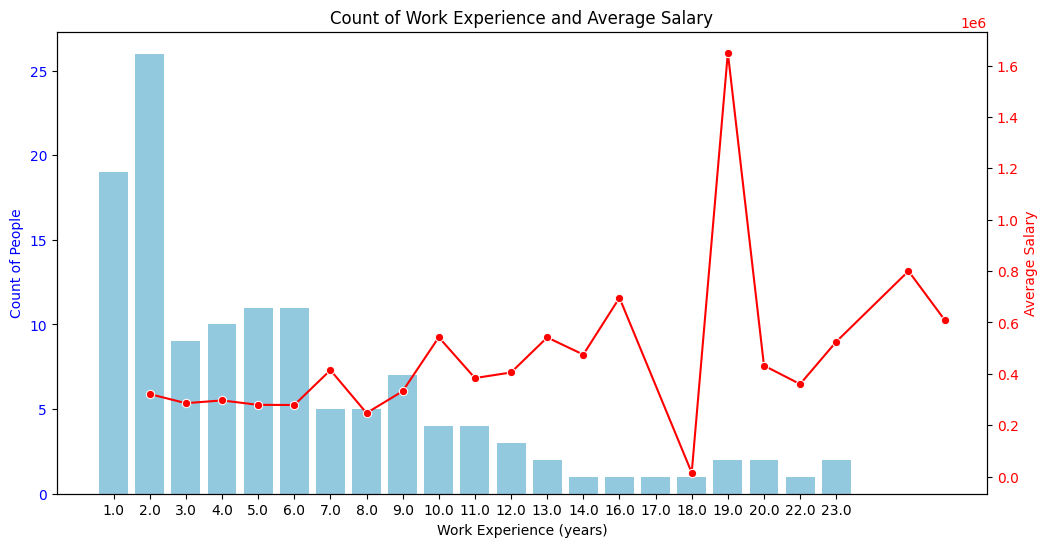

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the count of work experience as a bar plot
sns.barplot(x='Work_Experience', y='count', data=experience_summary, ax=ax1, color='skyblue')
ax1.set_xlabel('Work Experience (years)')
ax1.set_ylabel('Count of People', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create another y-axis for the average salary
ax2 = ax1.twinx()
sns.lineplot(x='Work_Experience', y='average_salary', data=experience_summary, ax=ax2, color='red', marker='o')
ax2.set_ylabel('Average Salary', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set the title of the plot
plt.title('Count of Work Experience and Average Salary')

# Show the plot
plt.show()